In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


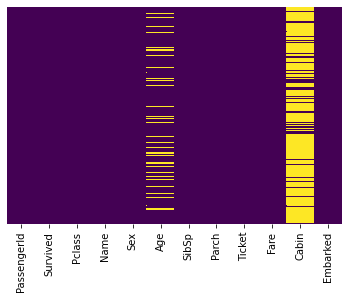

In [10]:
### Look for missing data using a heatmap
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Age has a low enough amount of missing data that we can impute the age data based on the other columns.

Cabin has too much missing data so we will probably drop it

In [11]:
sns.set_style('whitegrid')

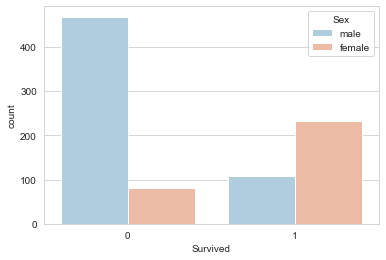

In [14]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

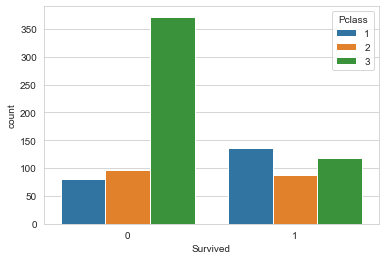

In [16]:
sns.countplot(x='Survived', data=train, hue='Pclass')

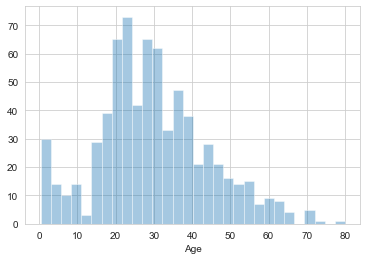

In [20]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


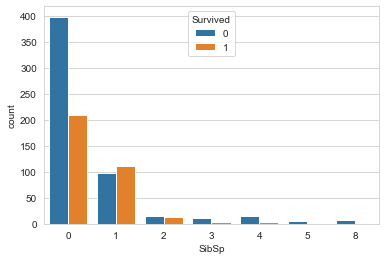

In [23]:
sns.countplot(x='SibSp', data=train, hue='Survived')

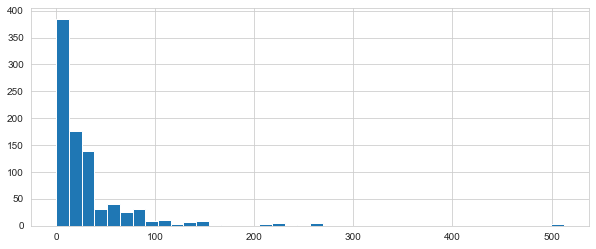

In [27]:
train['Fare'].hist(bins=40, figsize=(10,4))

# Data Cleaning

Data imputation (take the average age by passenger class & imput the mean into missing data)

In [30]:
import statistics

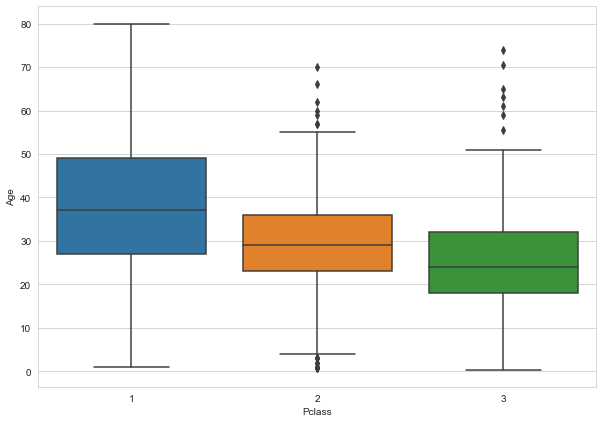

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [43]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
#             return statistics.mean(list(train[train['Pclass']==1]['Age']))
            return 37
        elif Pclass == 2:
#             return statistics.mean(list(train[train['Pclass']==2]['Age']))
            return 29
        else:
#             return statistics.mean(list(train[train['Pclass']==3]['Age']))
            return 24
    else:
        return Age

In [44]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

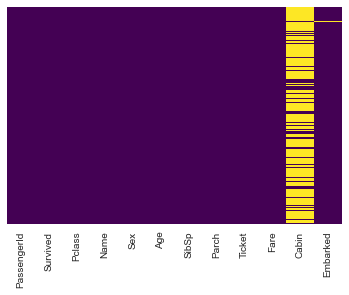

In [45]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [46]:
# drop the column missing a lot of info
train.drop('Cabin', axis=1, inplace=True)

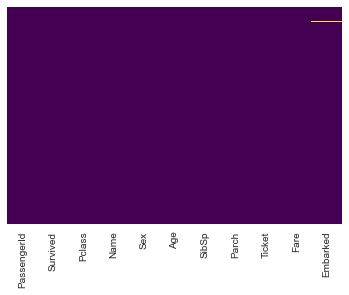

In [47]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [48]:
train.dropna(inplace=True)

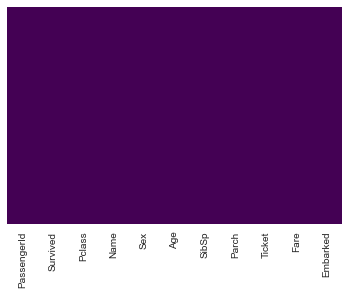

In [49]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
### Need to create dummy variables for sex and embarked - 0 or 1 to indicate information
# Need to remove one of these columns because they are perfect predictors of one another - leading to multi-colinearity
sex = pd.get_dummies(data=train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [56]:
embark = pd.get_dummies(data=train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [57]:
train = pd.concat([train, sex, embark],axis=1)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [61]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'],axis=1,inplace=True)

In [63]:
train.drop('PassengerId', axis=1,inplace=True)

In [64]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Train logistic regression model

In [65]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [66]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()

In [71]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predictions = logmodel.predict(X_test)

In [73]:
### Evaluate model using scikitlearn

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])